# Something this must be filled in
this
needs
some
words
in
it
as
an
explanation!


In [1]:
###Bring in the necessary packages to run the script
import os
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep
from tifffile import imsave


In [2]:
###To start, set the path to open your image. In this example the image bands are in a folder called "Image" in the 
###working directory. B* means that the script will read in all band tifs collectively rather than having to code each one.
image_path = glob("Image\LC08_L1TP_229063_20211031_20211109_01_T1_B*.tif")
###Ensure the bands are sorted in order
image_path.sort()
###Stack the bands into a single image. Give the no data values.
image, meta = es.stack(image_path, nodata=-9999)

###if you want to check the band order you can uncomment the line below
###print(image_path)



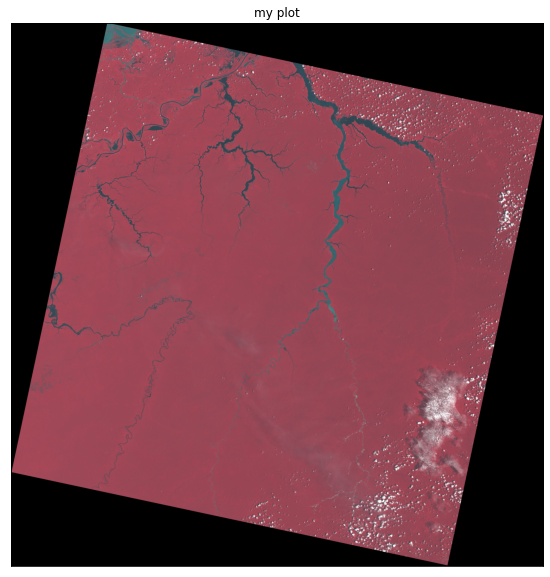

<AxesSubplot:title={'center':'my plot'}>

In [3]:
###plot your image. Default plot below is the false colour composite (4, 3, 2,) but these can be changed. Str_clip will 
###impact the amount of image stretch applied.
ep.plot_rgb(image, rgb = [4, 3, 2], title = "my plot", stretch=True, str_clip=0.1)

In [4]:
def ndvi (image, ndvi_plot_title, ndvi_cmap, vmin, vmax, 
          ndvi_classes, ndvi_colours, ndvi_class_names, 
          classification_plot_title):
    '''
    This function will run a normalised difference vegetation index(ndvi) on an image defined by the user. 
    It is programmed to use bands 4 and 5 from Landsat 8.
    If using Landsat 4-7 change the function as explained below. The output from this function is a raw ndvi of the image,
    and a classification of the image based on the ndvi values. 
    The variables required to customise the output are the image for analysis, the name of the raw ndvi plot, 
    the continuous colour palette for the ndvi plot, the min and max values to plot on the ndvi, the classes for the ndvi 
    classification, the specific colours for the ndvi classification, the class name and the name for the classified ndvi plot.
    These variables are explained below, too.
    '''
    
    ###Here we define the two bands as floats used to calculate the NDVI: red band and near infrared (NIR) band. 
    ###Keep [3] and [4] if using Landsat 8. Change to [2] and [3] if using Landsat 4-7.
    red = image[3].astype(float)
    nir = image[4].astype(float)
    
    ###and calculate the ndvi values
    my_ndvi = np.divide((nir-red), (nir+red))

    ###plot the ndvi using variables defined by user
    ep.plot_bands(my_ndvi, cmap = ndvi_cmap, title = ndvi_plot_title, vmin = vmin, vmax = vmax)
    
    ###Below we take the output array for our ndvi calculated above and give each value the integer value of the 
    ###classes variables that it falls into
    image_ndvi_class = np.digitize(my_ndvi, ndvi_classes)
    ### Apply a 'no data' mask to the array. This will remove no value data entries
    image_ndvi_class = np.ma.masked_where(np.ma.getmask(my_ndvi), image_ndvi_class)
    np.unique(image_ndvi_class)
    
    ###turn the specified colours variable into cmap format for plotting
    ndvi_cmap = ListedColormap(ndvi_colours)
    
    
    ###get list of classes from the masked array
    classes = np.unique(image_ndvi_class)
    classes = classes.tolist()
    ###the mask returns a value of 'NONE' as a class. This will give an error message that there are more classes (n+1) than
    ###colours in cmap (n). We can remove this. The number of classes will equals the length of the list of colours when
    ###the user defines them
    classes = classes[0:len(ndvi_class_names)]

    ###plot your data using variables defined by user.
    fig, ax = plt.subplots(figsize=(14, 14))
    im = ax.imshow(image_ndvi_class, cmap=ndvi_cmap)

    ep.draw_legend(im_ax=im, classes=classes, titles=ndvi_class_names)
    ax.set_title(classification_plot_title,
        fontsize=16,
    )
    ax.set_axis_off()

    ###auto adjust subplot to fit figure size
    plt.tight_layout()

In [5]:
###this is an example with some of the variables for the function above.
###note that image is defined above when stacking the bands together
###name the raw ndvi plot
ndvi_plot_title = "Your ndvi plot name"
###define the colour map. For example, "RdYlGn" (continuous scale red -> green) is often used for NDVI. Other options
###available at https://matplotlib.org/stable/tutorials/colors/colormaps.html
ndvi_cmap = "RdYlGn"

#vmin and vmax are parameters for plotting the raw ndvi values. Depending on your dataset you might want to bring these
###closer to zero to better show the spread of your data!
vmin = -1
vmax = 1

###below you can specify how many classes you like. Classes defined below are -np.inf (lowest value in dataset) -> 0,
###0 -> 0.15, 0.15 -> 0.3, 0.3 -> 0.5 and 0.5 -> +np.inf (highest value in dataset). 5 classes have been set here.
ndvi_classes = [-np.inf, 0, 0.15, 0.3, 0.5, np.inf]

###and then specify the colours for the classes
ndvi_colours = ["lightblue", "grey", "yellow", "lightgreen", "green"]

###and name the classes. Again, make sure this matches the number of classes.
ndvi_class_names = ["class one", "class two", "class three", "class four", 
                    "class five"]

###and name your final classification plot's title
classification_plot_title = "Your ndvi classification plot name"



C:\Users\IconI\.conda\envs\assignment_env\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide


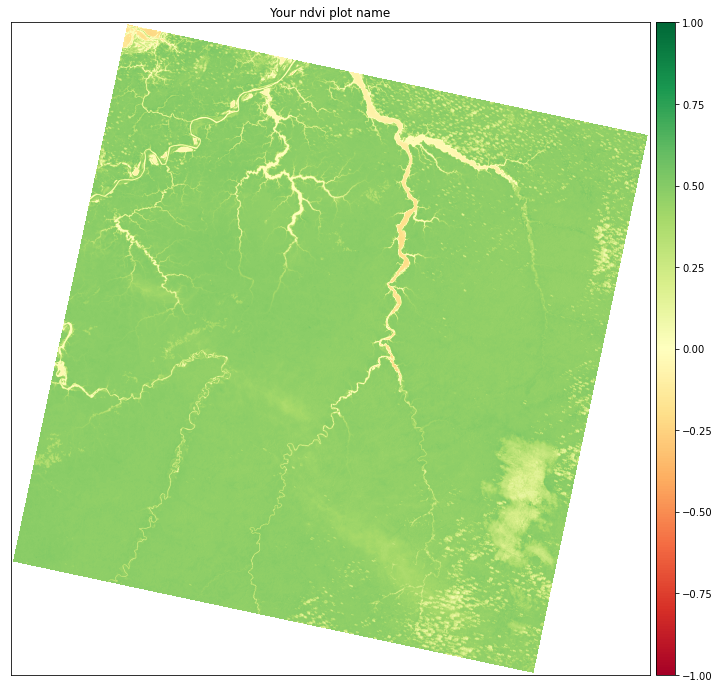

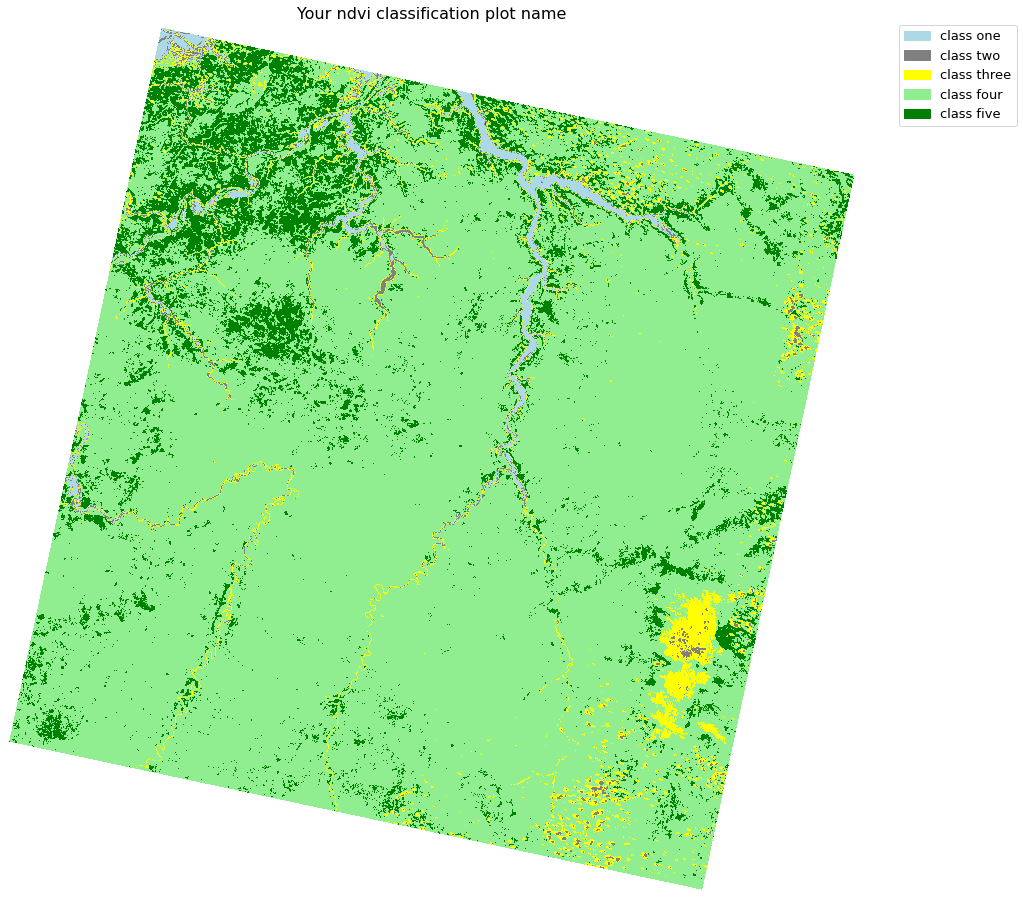

In [6]:
###run the function on your image. This will give you the plotted output for the NDVI.
ndvi(image, ndvi_plot_title, ndvi_cmap, vmin, vmax, ndvi_classes, ndvi_colours, ndvi_class_names, classification_plot_title)